In [1]:
import pandas as pd

In [6]:
jazz_albums_df = pd.read_csv("jazz_albums.csv")
jazz_albums_df.head()

,artist_id,album_id,album_name,release_date,total_tracks,album_type
0,5FgkTUuCNKDlilidPvZqOq,0HXxKGN9OFwFM2oagtWgy5,10 ans !,2024-11-15,49,album
1,5FgkTUuCNKDlilidPvZqOq,4B1QzSiWpXyTqqHcCacF4B,Scott Joplin – The King of Ragtime: Complete P...,2022-06-03,56,album
2,5FgkTUuCNKDlilidPvZqOq,4p0kK617C4LkEIlqBL00If,Syncopated Musings,2022-02-11,17,album
3,5FgkTUuCNKDlilidPvZqOq,71onYQW5RAV3c9PHAtkwYp,REFLECTIONS: Scott Joplin Reconsidered,2022-02-04,18,album
4,5FgkTUuCNKDlilidPvZqOq,6EeuhWrfzV2zWrp5idkiLg,"Joplin: Rags, Marches, Waltzes & Other Piano W...",2019-07-10,55,album


In [8]:
jazz_albums_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   artist_id     3718 non-null   object
 1   album_id      3718 non-null   object
 2   album_name    3718 non-null   object
 3   release_date  3718 non-null   object
 4   total_tracks  3718 non-null   int64 
 5   album_type    3718 non-null   object
dtypes: int64(1), object(5)
memory usage: 174.4+ KB


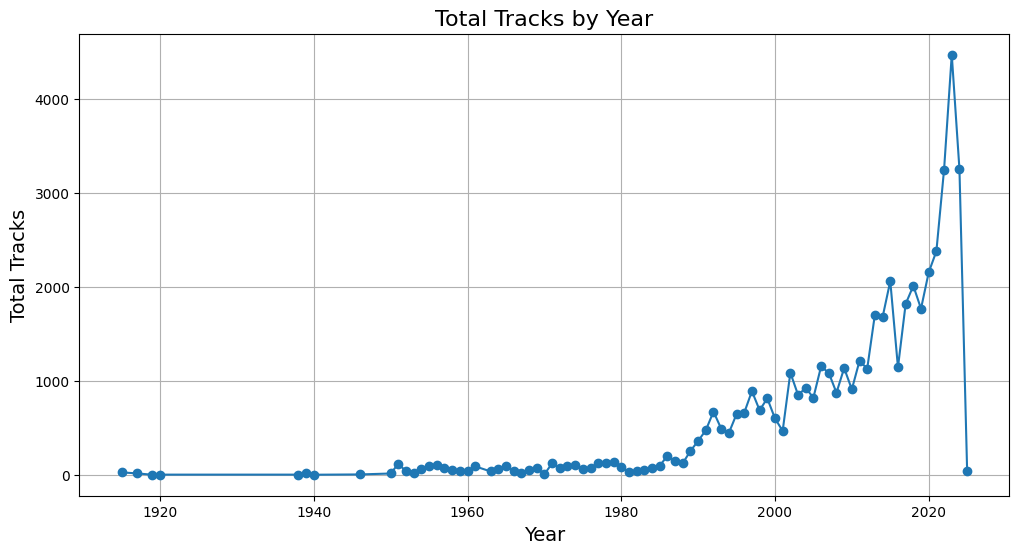

In [9]:
import matplotlib.pyplot as plt

# Convert 'release_date' column to datetime format and extract the year
jazz_albums_df['release_date'] = pd.to_datetime(jazz_albums_df['release_date'], errors='coerce')
jazz_albums_df['release_year'] = jazz_albums_df['release_date'].dt.year

# Group data by release year and sum the total tracks
tracks_per_year = jazz_albums_df.groupby('release_year')['total_tracks'].sum()

# Create a timeline plot for total tracks by year
plt.figure(figsize=(12, 6))
plt.plot(tracks_per_year.index, tracks_per_year.values, marker='o', linestyle='-')
plt.title('Total Tracks by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Tracks', fontsize=14)
plt.grid(True)
plt.show()


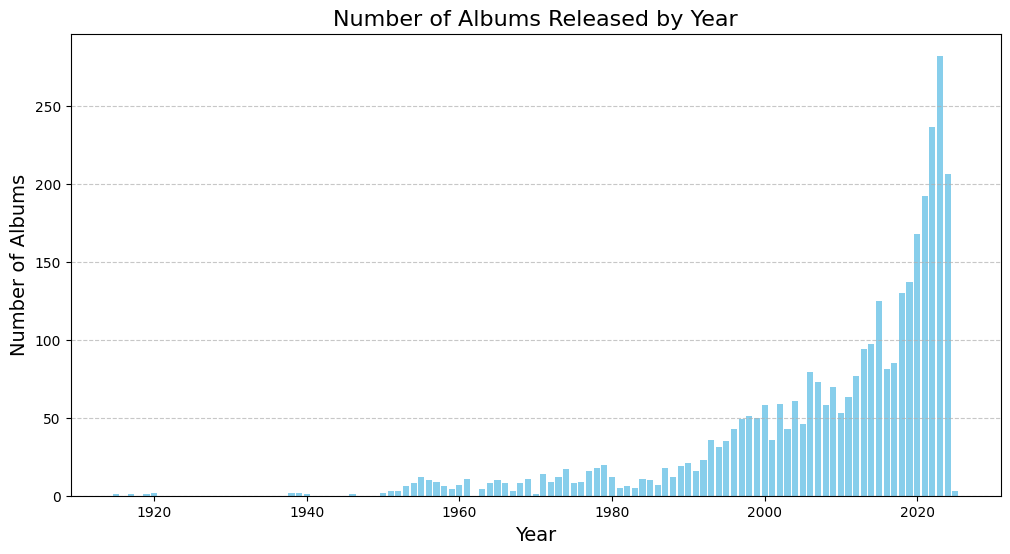

In [10]:
# Group data by release year and count the number of albums
albums_per_year = jazz_albums_df.groupby('release_year').size()

# Create a bar plot for the number of albums released by year
plt.figure(figsize=(12, 6))
plt.bar(albums_per_year.index, albums_per_year.values, color='skyblue')
plt.title('Number of Albums Released by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Albums', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


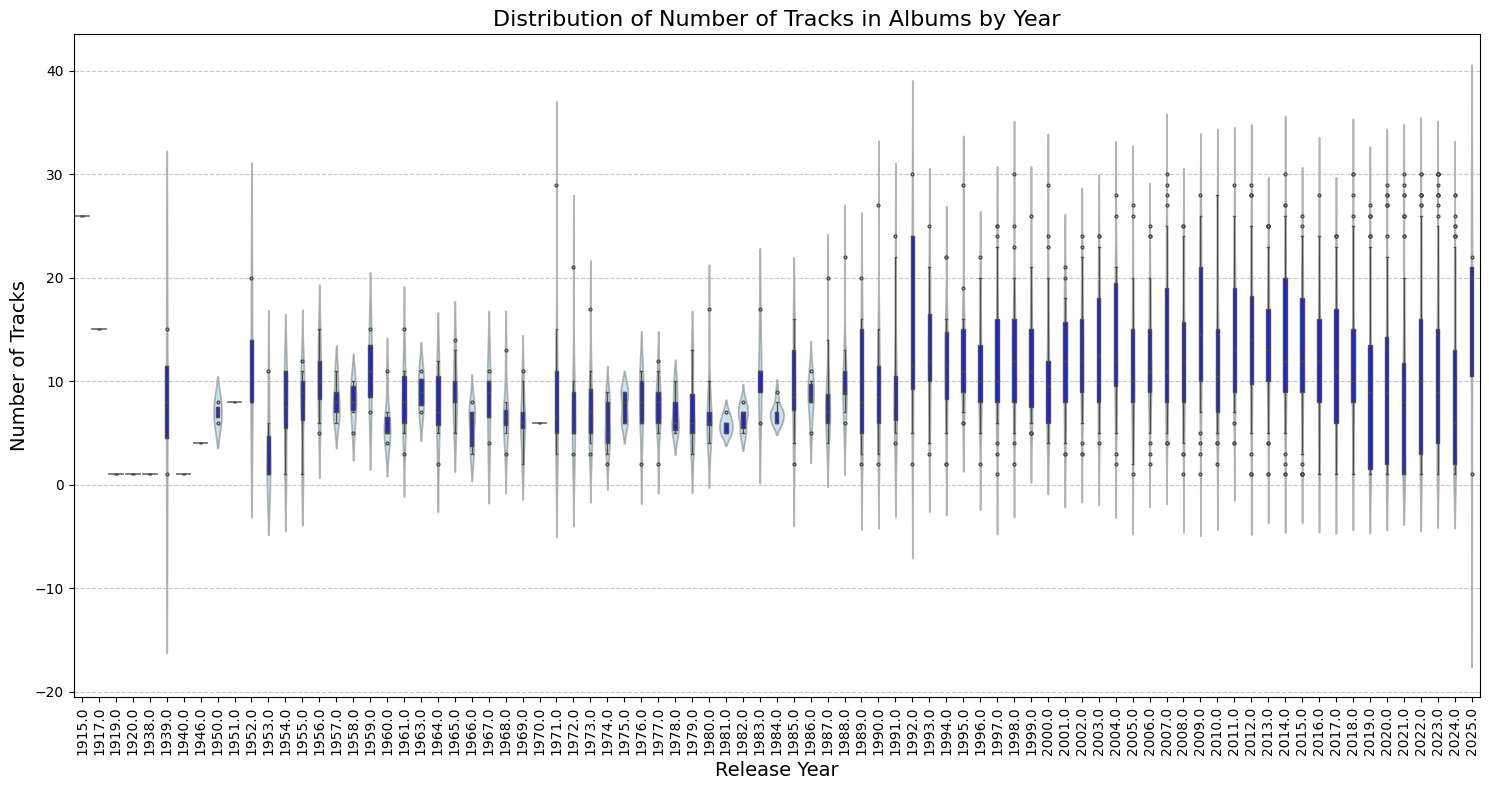

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure release_date is in datetime and extract the year if not already done
jazz_albums_df['release_date'] = pd.to_datetime(jazz_albums_df['release_date'], errors='coerce')
jazz_albums_df['release_year'] = jazz_albums_df['release_date'].dt.year

# Filter out years with missing data and reset index for plotting
filtered_data = jazz_albums_df.dropna(subset=['release_year'])
filtered_data = filtered_data[(filtered_data['release_year'] >= 1900) & (filtered_data['total_tracks']<=30)]  # Assuming valid years start from 1900

# Create a violin and box plot
plt.figure(figsize=(15, 8))
sns.violinplot(x='release_year', y='total_tracks', data=filtered_data, inner=None, color='skyblue', alpha=0.5)
sns.boxplot(x='release_year', y='total_tracks', data=filtered_data, whis=[5, 95], width=0.2, color='blue', fliersize=2)

# Enhance plot readability
plt.title('Distribution of Number of Tracks in Albums by Year', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
